<a href="https://colab.research.google.com/github/datle2403/datle2403/blob/main/AdAline_pipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [85]:
import numpy as np
from sklearn.base import BaseEstimator, TransformerMixin
class adaline(BaseEstimator, TransformerMixin):
  def __init__(self,iter=50,lr=0.001,random_state=1):
    self.iter=iter
    self.lr=lr
    self.random_state=random_state
  def net_input(self,X):
    return self.w_[0] + np.dot(X,self.w_[1:])
  def linear_activation_function(self,z):
    return z
  def fit(self,X,y):
    self.error_=[]
    rgen = np.random.RandomState(self.random_state)
    self.w_ = rgen.normal(loc=0.0, scale=0.01, size=1 + X.shape[1])
    for _ in range(self.iter):
      Z=self.net_input(X)
      A=self.linear_activation_function(Z)
      update=self.lr*(y-A)
      self.w_[0]+=np.sum(update)
      self.w_[1:]+=np.dot(X.T,update)
      error=self.cost_function(X,y)
      self.error_.append(error)
    return self
  def predict(self,X):
    return np.where(self.net_input(X)>0.0,1,-1)
  def cost_function(self,X,y):
    return 1/2*np.sum((y-self.net_input(X))**2)

[48.734405003475466, 47.268121538341724, 46.127493074312454, 45.11577153141929, 44.16300470536643, 43.244135928281686, 42.350009099392544, 41.47710358023412, 40.62389994660111, 39.78959323729818, 38.973637280057545, 38.17558324301583, 37.39502235241281, 36.63156549055842, 35.884835853049346, 35.15446623192374, 34.44009793908688, 33.74138031294905, 33.05797043399405, 32.38953291671958, 31.735739730967378, 31.096270035958685, 30.470810021078176, 29.859052751247802, 29.26069801607837, 28.675452182464248, 28.103028050456267, 27.54314471230968, 26.995527414626324, 26.45990742351922, 25.93602189273203, 25.42361373464812, 24.92243149412579, 24.43222922509762, 23.952766369873352, 23.483807641087196, 23.025122906231452, 22.57648707471985, 22.137679987425287, 21.708486308637532, 21.288695420388127, 20.878101319090366, 20.476502514443947, 20.083701930554284, 19.69950680921833, 19.323728615329287, 18.95618294435364, 18.59668943183545, 18.245071664883135, 17.901157095595575, 17.564776956384865, 17.

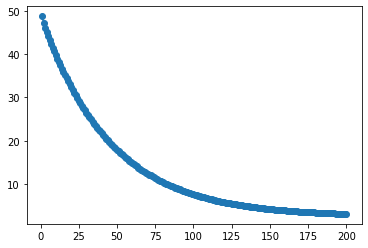

In [86]:
import pandas as pd
import matplotlib.pyplot as plt
#load dataset
df=pd.read_csv('Iris.csv')
X=df.iloc[:100,[1,3]].values
y=df.iloc[:100,5].values
y=np.where(y=='Iris-setosa',-1,1)
ada=adaline(iter=200,lr=0.0001)
ada.fit(X,y)
print(ada.error_)
plt.plot(range(1, len(ada.error_) + 1), ada.error_, marker='o')

In [107]:
from sklearn.model_selection import GridSearchCV
iter=[x for x in range(0,100)]
param_grid = [
    {'iter': iter},
    {'lr':[0.1,0.01,0.001,0.0001]}
  ]
grid_search = GridSearchCV(ada, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True,refit=True)
grid_search.fit(X,y)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in add
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: overflow encountered in square
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:86: RuntimeWarning: overflow encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2

GridSearchCV(cv=5, estimator=adaline(iter=200, lr=0.0001),
             param_grid=[{'iter': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,
                                   14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24,
                                   25, 26, 27, 28, 29, ...]},
                         {'lr': [0.1, 0.01, 0.001, 0.0001]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [108]:
grid_search.best_estimator_

adaline(iter=66, lr=0.0001)

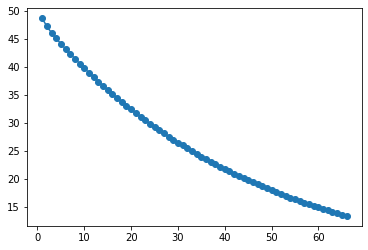

In [103]:
b=grid_search.best_estimator_
plt.plot(range(1, len(b.error_) + 1), b.error_, marker='o')

200

In [90]:
b.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

In [104]:
grid_search.best_params_

{'iter': 66}

In [115]:
#building pipeline 
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
num_pipeline = Pipeline([
        ('std_scaler', StandardScaler()),
        ('ada',adaline(**grid_search.best_params_))
    ])
num_pipeline.fit(X,y)
num_pipeline.predict(X)

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])